# El problema

Una empresa de bicicletas compartidas que opera en el área de una ciudad específica.  tiene un esquema de funcionamiento en el cual los usuarios pueden alquilar una bicicleta 
desde un lugar en particular y devolverla en un luar diferente utilizando su infraestructura.

El problema consiste en predecir cuántas bicicletas se van a utilizar en el futuro. 
Para ello se nos facilita un archivo csv donde aparecen el número de bicicletas contratadas 
todos los días y las variables metereológicas de esos días.

Se usará análisis de regresión con el fin de  capturar la relación entre características y 
número de bicicletas contratadas en un modelo.

# Carga de Datos

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving bikes.csv to bikes (1).csv
User uploaded file "bikes.csv" with length 54187 bytes


En el fichero CSV, como se ha mencionado, están incluidas las variables metereológicas diarias y el número de bicicletas contratadas.

In [0]:
import pandas as pd
import io
bikes = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
bikes

date  temperature   humidity  windspeed       count
0    2011-01-03     2.716070  45.715346  21.414957  120.000000
1    2011-01-04     2.896673  54.267219  15.136882  108.000000
2    2011-01-05     4.235654  45.697702  17.034578   82.000000
3    2011-01-06     3.112643  50.237349  10.091568   88.000000
4    2011-01-07     2.723918  49.144928  15.738204  148.000000
5    2011-01-08     1.967445  48.851252  17.035029  112.333333
6    2011-01-09     1.210973  48.557576  18.331855   76.666667
7    2011-01-10     0.454501  48.263900  19.628680   41.000000
8    2011-01-11     1.361393  59.623460  12.414597   43.000000
9    2011-01-12     1.541997  54.775880  25.432188   25.000000
10   2011-01-13     1.158189  47.565957  25.173470   38.000000
11   2011-01-14     0.953048  51.329770  12.729596   54.000000
12   2011-01-15     1.645921  55.850225  13.090300   42.750000
13   2011-01-16     2.338794  60.370679  13.451004   31.500000
14   2011-01-17     3.031667  64.891133  13.811708   20.250000
15   2011-01-18     3.724539  69.411587  14.172412    9.000000
16   2011-01-19     7.475045  62.715350  18.562278   78.000000
17   2011-01-20     5.959733  51.358079  17.676844   83.000000
18   2011-01-21     1.779077  46.821447  28.899955   75.000000
19   2011-01-22     0.452718  47.466458  24.265518   78.666667
20   2011-01-23    -0.873641  48.111470  19.631082   82.333333
21   2011-01-24    -2.200000  48.756481  14.996645   86.000000
22   2011-01-25     4.062848  55.748088  12.961280  186.000000
23   2011-01-26     3.765915  69.458098  24.663452   34.000000
24   2011-01-27     2.648318  59.686889  11.822905   15.000000
25   2011-01-28     3.069429  65.579933  12.497912   38.000000
26   2011-01-29     2.694496  62.056845  14.017077   39.333333
27   2011-01-30     2.319563  58.533757  15.536242   40.666667
28   2011-01-31     1.944630  55.010668  17.055406   42.000000
29   2011-02-01     2.507948  67.619156   7.498521   47.000000
..          ...          ...        ...        ...         ...
699  2012-12-02    12.886051  61.959077   9.026754  490.666667
700  2012-12-03    15.438592  64.153728   9.603348  555.000000
701  2012-12-04    16.597565  62.269280  16.123607  551.000000
702  2012-12-05    14.734904  48.380206  26.815586  331.000000
703  2012-12-06     5.669952  49.706298  16.168189  340.000000
704  2012-12-07     8.898565  63.967628  13.018630  349.000000
705  2012-12-08    10.802619  66.961024  14.438311  342.333333
706  2012-12-09    12.706673  69.954419  15.857993  335.666667
707  2012-12-10    14.610726  72.947815  17.277674  329.000000
708  2012-12-11    10.512872  54.615186  24.819453  282.000000
709  2012-12-12     7.739593  51.358079  15.325268  310.000000
710  2012-12-13     7.656791  48.426717  16.123607  425.000000
711  2012-12-14     6.953152  57.197576  13.063497  429.000000
712  2012-12-15     8.802005  62.114188  12.279551  356.666667
713  2012-12-16    10.650858  67.030799  11.495604  284.333333
714  2012-12-17    12.499710  71.947411  10.711657  212.000000
715  2012-12-18    13.368952  58.500386  19.495790  433.000000
716  2012-12-19     9.478076  56.220456  16.834280  333.000000
717  2012-12-20     9.353899  58.593463  13.151520  314.000000
718  2012-12-21     9.188346  52.381767  30.407969  221.000000
719  2012-12-22     7.609421  56.748790  23.342550  205.333333
720  2012-12-23     6.030497  61.115812  16.277130  189.666667
721  2012-12-24     4.451573  65.482835   9.211711  174.000000
722  2012-12-25     4.750319  66.377012  17.747048   91.500000
723  2012-12-26     5.049065  67.271190  26.282385    9.000000
724  2012-12-27     5.587201  57.755931  28.678187  247.000000
725  2012-12-28     5.545775  54.242931  14.792709  644.000000
726  2012-12-29     4.924888  54.010283  14.777848  575.666667
727  2012-12-30     4.304001  53.777635  14.762987  507.333333
728  2012-12-31     3.683114  53.544987  14.748127  439.000000

[729 rows x 5 columns]

# Exploración

Vamos a explorar con estadística básica nuestro conjunto de datos para ver si podemos sacar alguna conclusión

In [0]:
#0.2 Explore Data
# charts from https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
import matplotlib.pyplot as plt
plt.rcdefaults()

Los histogramas agrupan los datos en ubicaciones  y proporcionan un recuento de los 
número de observaciones en cada caso. 
Sirven para identificar la distribución de los datos, y es posible que nos permita también identificación valores atípicos. 

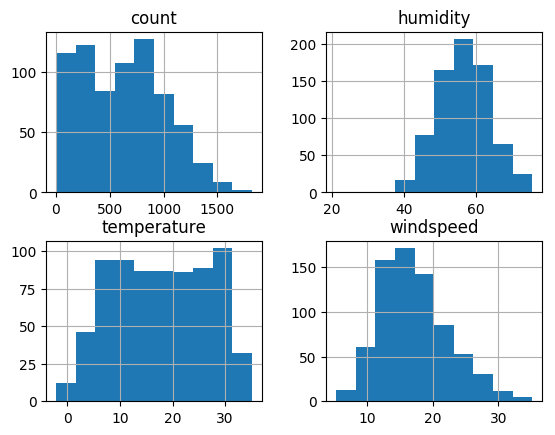

In [0]:
#0.2.1 Univariate Histograms
# 
bikes.hist()
plt.show()

Los diagramas de densidad son otra forma de tener una idea rápida de la distribución de cada atributo. Los diagrams parecen *histogramas abstractos* que mediante una curva suve dibujan la distribución de los datos.

In [0]:
#0.2.2 Density Plots
bikes.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()


Un gráfico de dispersión (ScatterPlot) muestra la relación entre dos 
variables como puntos en dos  dimensiones, un eje por cada atributo
Las gráficas de dispersión son útiles para detección de relaciones estructuradas 
entre variables

In [0]:
#0.2.3 Scatterplot matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(bikes)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Los diagramas de correlación nos indicarán cuan correlacionadas están los atributos predictores con el valor a predecir

In [0]:
#0.2.4

# NOTE: Low correlation means there's no linear relationship; 
# it doesn't mean there's no information in the feature that predicts the target.


import numpy as np
from scipy.stats.stats import pearsonr 
corr = [pearsonr(bikes['temperature'], bikes['count'])[0], pearsonr(bikes['humidity'], bikes['count'])[0], 
        pearsonr(bikes['windspeed'], bikes['count'])[0]]

 
features= ('temperature', 'humidity', 'windspeed')
y_pos = np.arange(len(features))
 
plt.bar(y_pos, corr, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Correlation')
plt.title('Correlation features vs target')

plt.show()



# Modelado

In [0]:
#1.1 Model Parametrization 
# criterion: mse mean squared error, which is equal to variance reduction as feature selection criterion
#splitter: best/random
# max_depth: low value avoid overfitting
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=0)

## Modelo con una sola variable

In [0]:
#1.1 Model Parametrization 
# criterion: mse mean squared error, which is equal to variance reduction as feature selection criterion
#splitter: best/random
# max_depth: low value avoid overfitting
regressor = DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=0)



In [0]:
#1.2 Model construction
#regressor.fit(bikes[['temperature', 'humidity', 'windspeed']], bikes['count'])
# one feature predictor
regressor.fit(bikes[['temperature']], bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

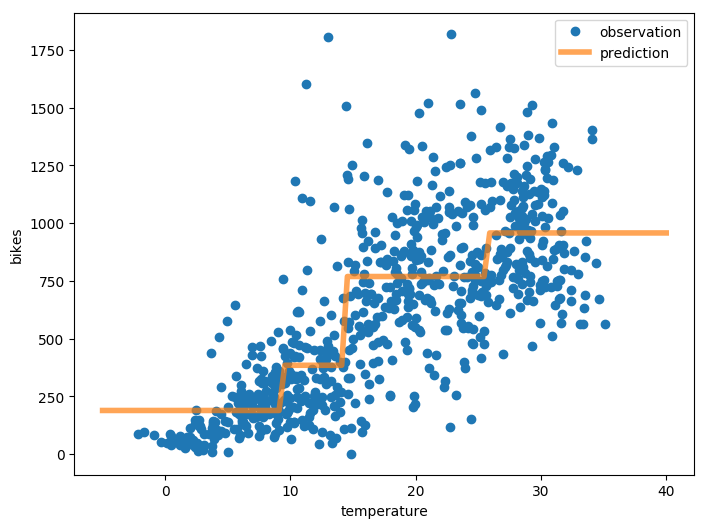

In [0]:
# 2.2 Model Plot
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

## Modelo con dos variables

In [0]:
#1.2 Model construction
regressor.fit(bikes[['temperature', 'humidity']], bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

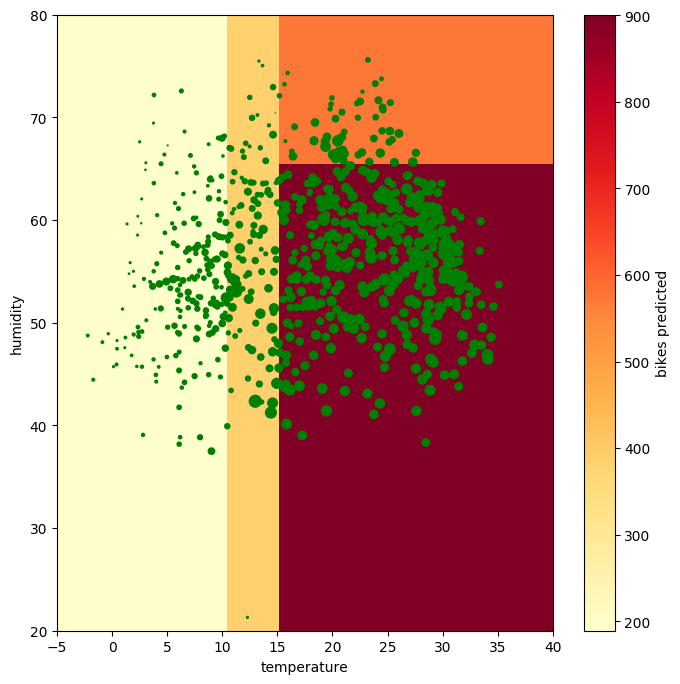

In [0]:
# This visualization is only useful for a model of two predictors

nx = 30
ny = 30
# creating a grid of points
x_temperature = np.linspace(-5, 40, nx)
y_humidity = np.linspace(20, 80, ny)
xx, yy = np.meshgrid(x_temperature, y_humidity)
# evaluating the regresson on all the points
z_bikes = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))


fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_temperature, y_humidity, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(bikes['temperature'], bikes['humidity'], s=bikes['count']/25.0, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_temperature), np.max(x_temperature))
plt.ylim(np.min(y_humidity), np.max(y_humidity))
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()


Vamos a construir el modelo con las tres variables y vamos a analizar posteriormente la importancia de las características según el árbol de decisión

In [0]:
#1.2 Model construction
regressor.fit(bikes[['temperature', 'humidity', 'windspeed']], bikes['count'])

print ('Feature Relevances')
pd.DataFrame({'Attributes': features ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevances


Attributes  Decision Tree
0  temperature       0.890157
1     humidity       0.109843
2    windspeed       0.000000

# Parametrización

Primero vamos a probar viendo si nuestro rendimiento mejora aumentando la profundiad evaluando con el propio conjunto de entrenamiento

In [0]:
# Compute the max 
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 30):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(bikes[['temperature', 'humidity']], bikes['count'])
    pred_values = regressor.predict(bikes[['temperature', 'humidity']])
    maev = mean_absolute_error(bikes['count'],pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,30), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

Un árbol muy profundo aprenderá con muy poco error el valor del conjunto de entrenamiento. Pero el problema está en el sobreaprendizaje, es decir, aprenderemos muy en detalle las observaciones del conjunto de entrenamiento pero seremos muy poco flexibles ante nuevas circunstancias. 



# Referencias

**Exploracion:  **

https://machinelearningmastery.com/visualize‐machine‐learning‐data‐python‐pandas/

**Librería:**  
http://scikit‐learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

** Problema y Código: **

https://cambridgespark.com/content/tutorials/getting‐started‐with‐regression‐and‐decision‐trees/index.html

https://cambridgespark.com/content/tutorials/from‐simple‐regression‐to‐multiple‐regression‐with‐decision‐trees/index.html